In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import chi2


Reading Dataset


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/care4better/AI_task/lungs_cancer/dataset/lungs_cancer.csv')

In [ ]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Preprocessing

In [ ]:
def find_missing_value(data):
  missed_val = pd.DataFrame({'column_name':[],'missing_value':[],'missing_percentage':[]})
  for col in data.columns:
    sum_missing_value = data[col].isnull().sum()
    percent_miss_value = round(sum_missing_value/data.shape[0]*100,2)
    missed_val = missed_val.append(dict(zip(missed_val.columns,[col,sum_missing_value,percent_miss_value])),ignore_index = True)
  return missed_val  

In [ ]:
missing_value = find_missing_value(dataset)
display(missing_value[missing_value['missing_percentage']>0.0])
print("\n")
print(f"Number of columns with missing values:{str(missing_value[missing_value['missing_percentage']>0.0].shape[0])}")

,column_name,missing_value,missing_percentage




Number of columns with missing values:0


In [ ]:
dataset.replace({'GENDER':{'M':0,'F':1}},inplace=True)

In [ ]:
dataset.replace({'LUNG_CANCER':{'YES':1,'NO':0}},inplace=True)

In [ ]:
dataset


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


Data Visualization

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'Customer_data'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

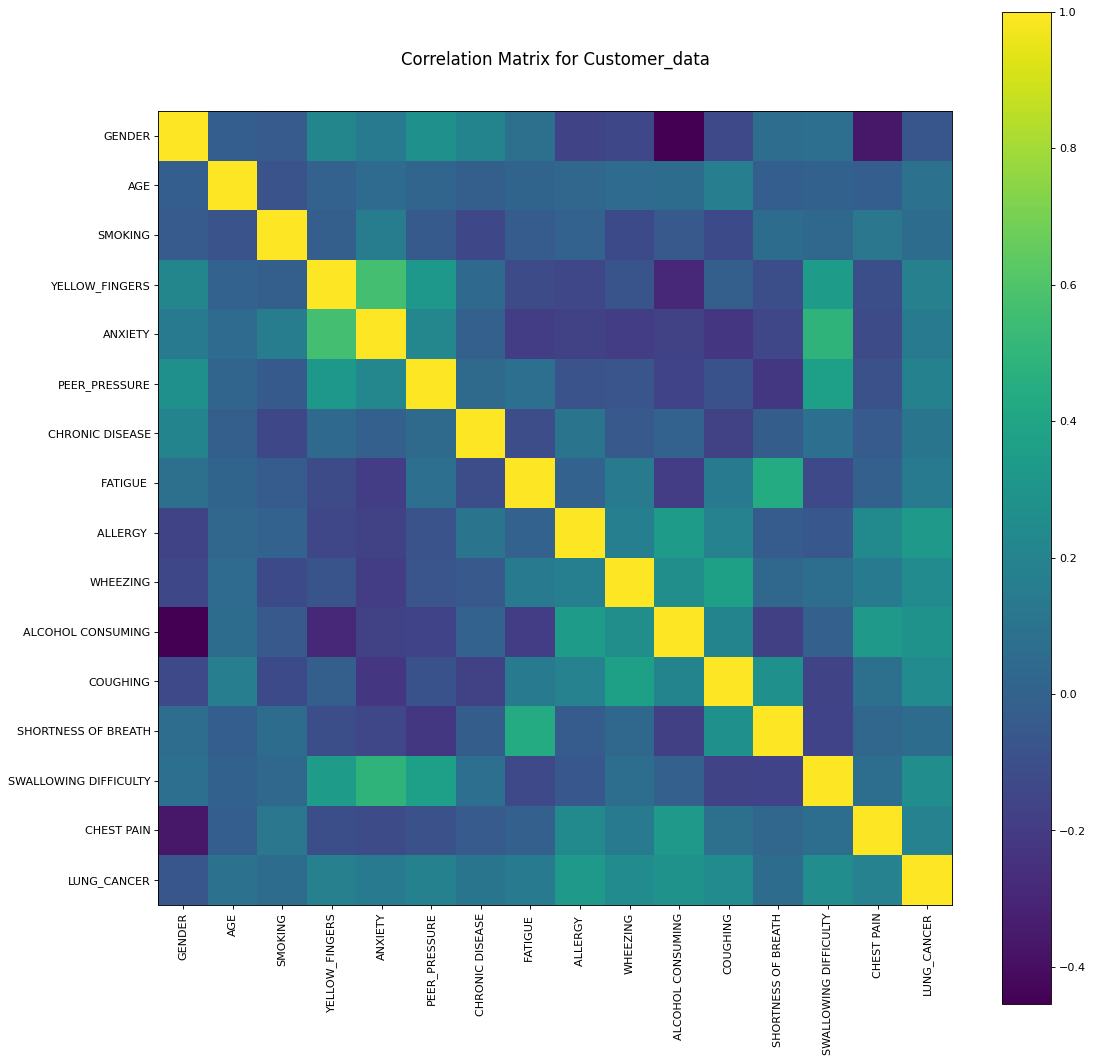

In [ ]:
plotCorrelationMatrix(dataset, 16)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


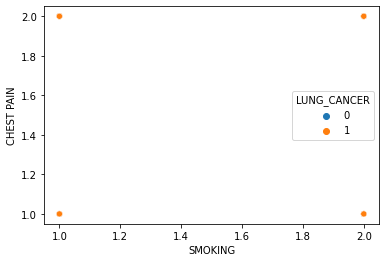

In [ ]:
sns.scatterplot(dataset['SMOKING'], dataset["CHEST PAIN"], hue=dataset["LUNG_CANCER"])

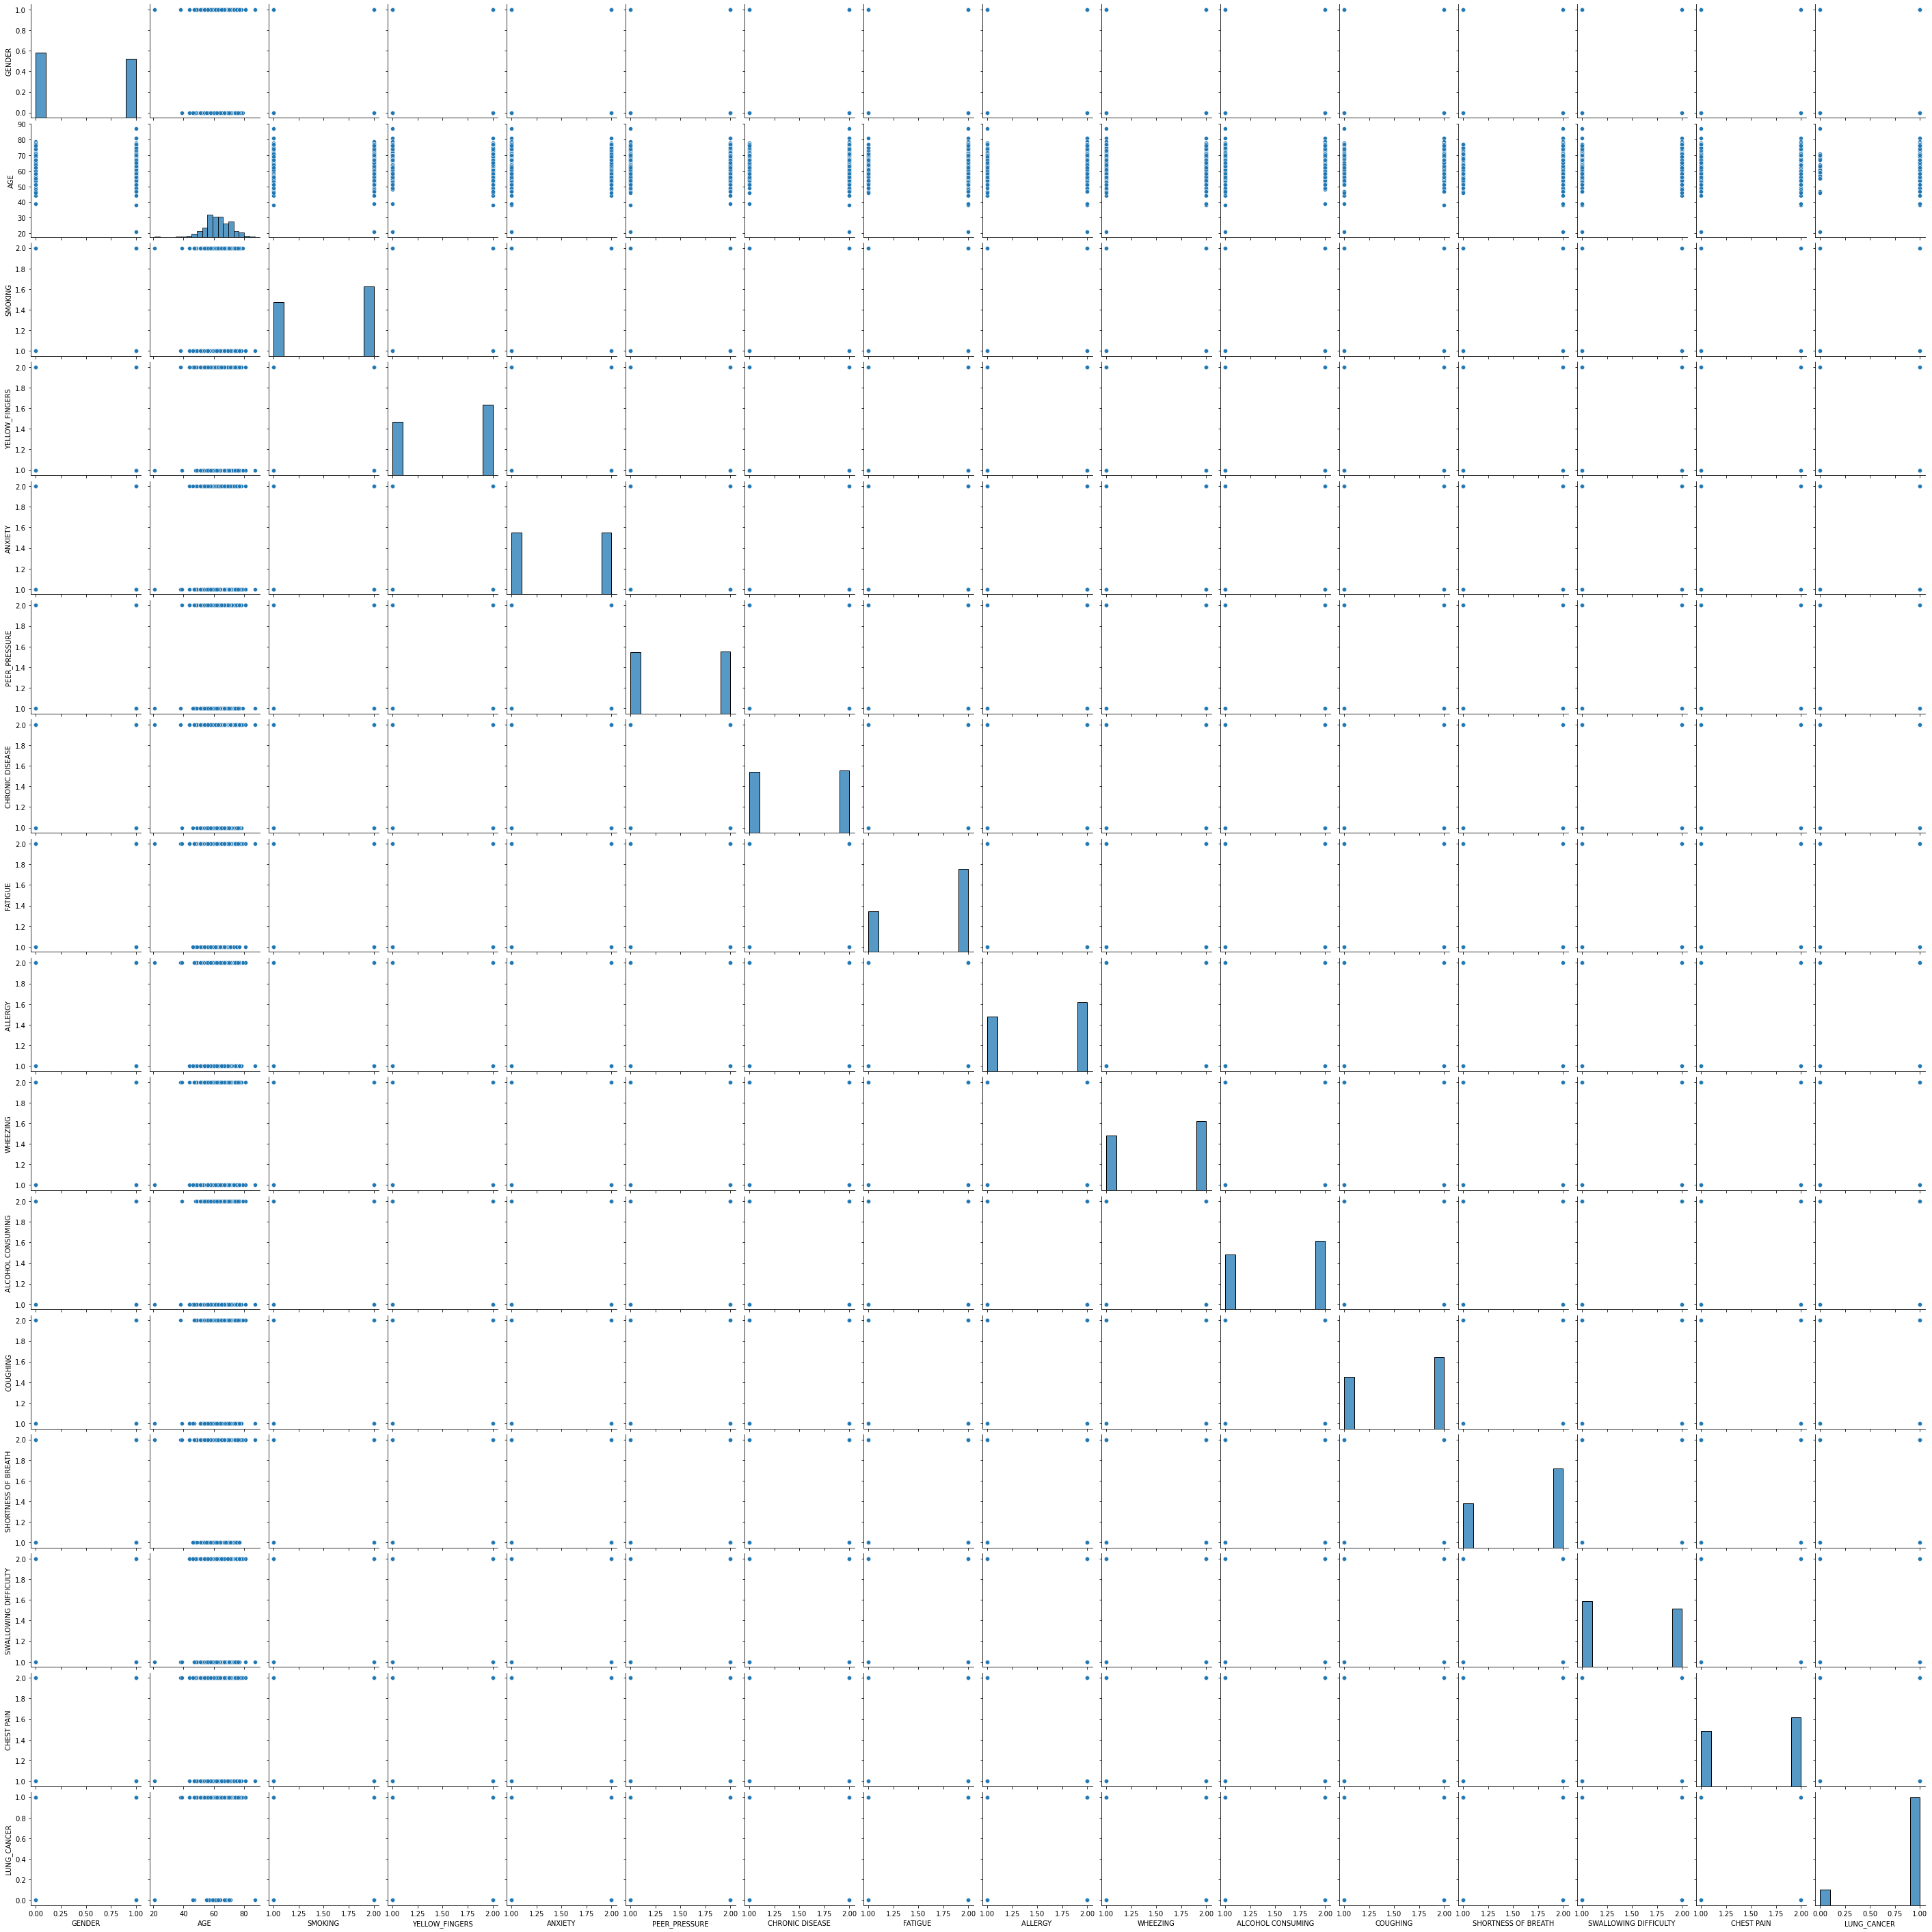

In [ ]:
sns.pairplot(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


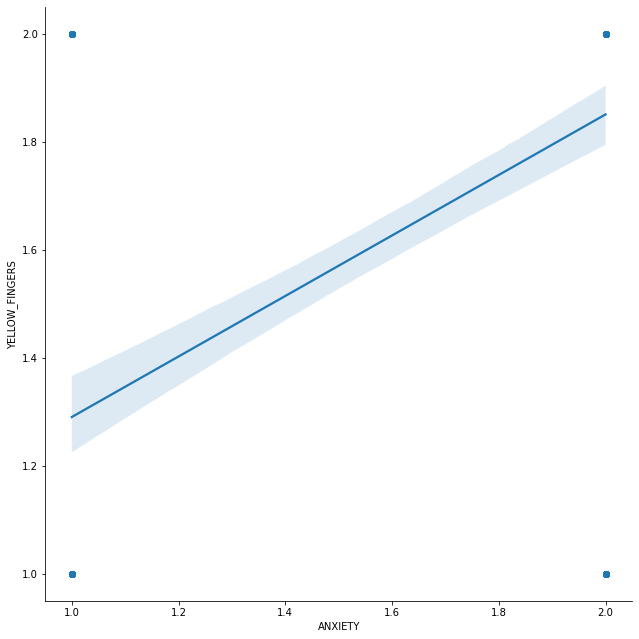

In [ ]:
sns.pairplot(data=dataset, x_vars=['ANXIETY'], y_vars=['YELLOW_FINGERS'], size=9, kind='reg')
plt.show()

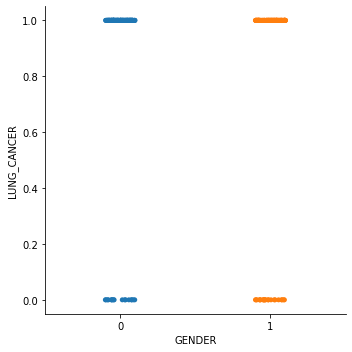

In [ ]:
sns.catplot(x="GENDER", y="LUNG_CANCER", data=dataset)

In [ ]:
rslt = dataset['GENDER'].corr(dataset['LUNG_CANCER'])
rslt

-0.06725417467830659

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


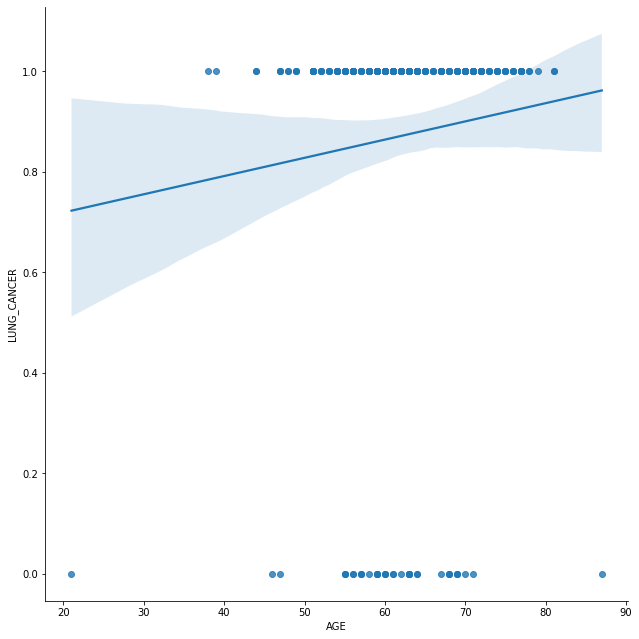

0.08946457606623369


In [ ]:
sns.pairplot(data=dataset, x_vars=['AGE'], y_vars=['LUNG_CANCER'], size=9, kind='reg')
plt.show()

rslt = dataset['AGE'].corr(dataset['LUNG_CANCER'])
print(rslt)

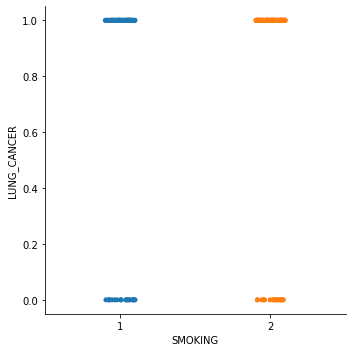

0.05817888585203872


In [ ]:

sns.catplot(x="SMOKING", y="LUNG_CANCER", data=dataset)
plt.show()

rslt = dataset['SMOKING'].corr(dataset['LUNG_CANCER'])
print(rslt)

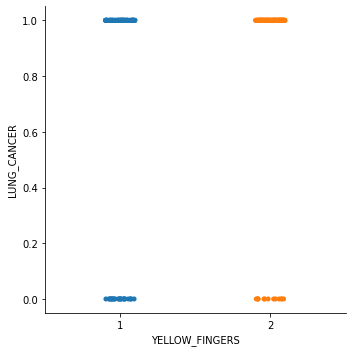

0.18133896271065755


In [ ]:

sns.catplot(x="YELLOW_FINGERS", y="LUNG_CANCER", data=dataset)
plt.show()

rslt = dataset['YELLOW_FINGERS'].corr(dataset['LUNG_CANCER'])
print(rslt)

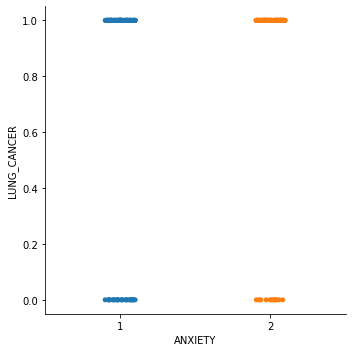

0.14494713288731198


In [ ]:
sns.catplot(x="ANXIETY", y="LUNG_CANCER", data=dataset)
plt.show()

rslt = dataset['ANXIETY'].corr(dataset['LUNG_CANCER'])
print(rslt)

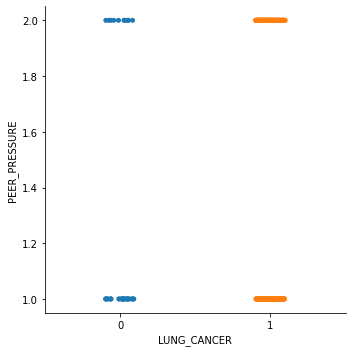

0.1863876317154079


In [ ]:
sns.catplot(x="LUNG_CANCER", y="PEER_PRESSURE", data=dataset)
plt.show()

rslt = dataset['PEER_PRESSURE'].corr(dataset['LUNG_CANCER'])
print(rslt)

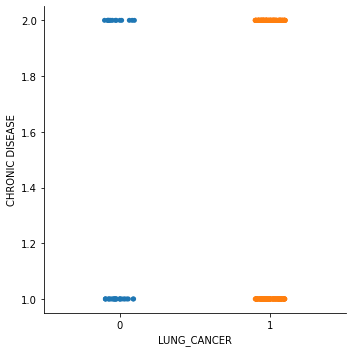

0.11089109464241383


In [ ]:
sns.catplot(x="LUNG_CANCER", y="CHRONIC DISEASE", data=dataset)
plt.show()

rslt = dataset['CHRONIC DISEASE'].corr(dataset['LUNG_CANCER'])
print(rslt)

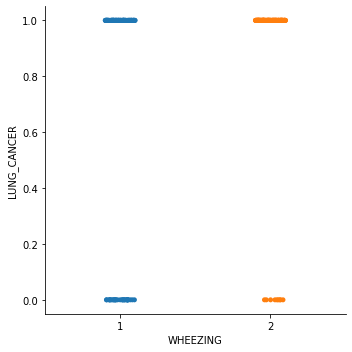

0.2492999598990599


In [ ]:


sns.catplot(x="WHEEZING", y="LUNG_CANCER", data=dataset)
plt.show()

rslt = dataset['WHEEZING'].corr(dataset['LUNG_CANCER'])
print(rslt)

<BarContainer object of 309 artists>

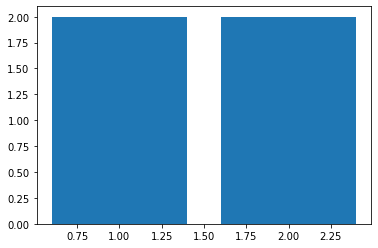

In [ ]:
plt.bar(dataset['YELLOW_FINGERS'],dataset['ANXIETY'])

In [ ]:
rslt = dataset['ALCOHOL CONSUMING'].corr(dataset['GENDER'])
rslt

-0.4542677958557483

final features selection

In [ ]:
final_dataset = dataset

target = final_dataset['LUNG_CANCER']
features = ['SMOKING','ANXIETY','PEER_PRESSURE','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN']
X = final_dataset[features]
y = target

Dataset splitation 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy matrix function

In [ ]:
def accuracy_metrics(y_test,predictions):
  from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
  precision = precision_score(y_test,predictions)
  recall = recall_score(y_test,predictions)
  f1_score = f1_score(y_test,predictions)
  accuracy = accuracy_score(y_test,predictions)

  print('Accuracy score: {0:0.2f}'.format(
      accuracy))
  print('Average precision score: {0:0.2f}'.format(
      precision))
  print('recall score: {0:0.2f}'.format(
    recall))
  print('f1score: {0:0.2f}'.format(
    f1_score))

Random Forest classifiar with random search


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV




n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X,y)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    5.5s


Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 92, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}  



[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.2s finished


In [ ]:
rf_best_param = RandomForestClassifier(n_estimators=60, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto', max_depth= 100, bootstrap= True)
rf_best_param.fit(X_train,y_train)
predictions = rf_best_param.predict(X_test)
accuracy_metrics(y_test,predictions)

Accuracy score: 0.95
Average precision score: 0.98
recall score: 0.97
f1score: 0.97


Logistic regression with random search

In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
lr = LogisticRegression()
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
clf = RandomizedSearchCV(lr, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
predict=best_model.predict(X_test)
accuracy_metrics(y_test,predict)


Best Penalty: l2
Best C: 3.730229437354635
Accuracy score: 0.96
Average precision score: 0.98
recall score: 0.98
f1score: 0.98


Decision Tree classifiar with random search

In [ ]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [10, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
bst_mdl = tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

pred = bst_mdl.predict(X_test)
accuracy_metrics(y_test,pred)

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.8704016913319238
Accuracy score: 0.95
Average precision score: 0.99
recall score: 0.95
f1score: 0.97


KNeighborsClassifier with grid search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  GridSearchCV
knn = KNeighborsClassifier()
grid_params = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gs = GridSearchCV(knn,grid_params,verbose=1,cv=3,n_jobs =-1)

model = gs.fit(X_train,y_train)
print('best params:',gs.best_params_)
print('best score:',gs.best_score_)

prd = model.predict(X_test)
accuracy_metrics(y_test,prd)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


best params: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
best score: 0.8935185185185185
Accuracy score: 0.95
Average precision score: 0.98
recall score: 0.97
f1score: 0.97


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.2s finished
